In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-music-reviews/Musical_Instruments_5.json
/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv


In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('/kaggle/input/amazon-music-reviews/Musical_instruments_reviews.csv')
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
data.shape

(10261, 9)

In [5]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
# null_reviewText = data[data['reviewText'].isnull()]
# print("Rows with null values in 'reviewText':")
# print(null_reviewText[['summary', 'reviewText']])

# # Fill null values in 'reviewText' with corresponding values from 'summary'
# data['reviewText'].fillna(data['summary'], inplace=True)

# # Check if all null values in 'reviewText' have been imputed
# if data['reviewText'].isnull().sum() == 0:
#     print("\nAll null values in 'reviewText' have been imputed.")
# else:
#     print("\nSome null values in 'reviewText' could not be imputed.")



data.reviewText.fillna('', inplace = True)

In [7]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [8]:
data.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')

as we are making the sentiment analysis model so we drop the irrevelant columns

In [9]:
drop_col = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime']
data.drop(columns = drop_col, inplace = True)

In [10]:
data.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [11]:
data['review'] = data['reviewText'] + ' ' + data['summary']
data.drop(columns = ['reviewText', 'summary'], inplace = True)

In [12]:
data.head()

,overall,review
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


In [13]:
# Define thresholds for positive, negative, and neutral ratings
positive_threshold = 3.5
negative_threshold = 2.5
#positive = 1
#negative = -1
#neutral = 0

# Split the "overall" column into positive, negative, and neutral categories
data['sentiment'] = data['overall'].apply(lambda rating: '1' if rating > positive_threshold else '-1' if rating < negative_threshold else '0')

In [14]:
data['sentiment'].value_counts()

sentiment
1     9022
0      772
-1     467
Name: count, dtype: int64

In [15]:
data.drop('overall', axis=1, inplace=True)

In [16]:
data.head()

,review,sentiment
0,"Not much to write about here, but it does exac...",1
1,The product does exactly as it should and is q...,1
2,The primary job of this device is to block the...,1
3,Nice windscreen protects my MXL mic and preven...,1
4,This pop filter is great. It looks and perform...,1


In [17]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

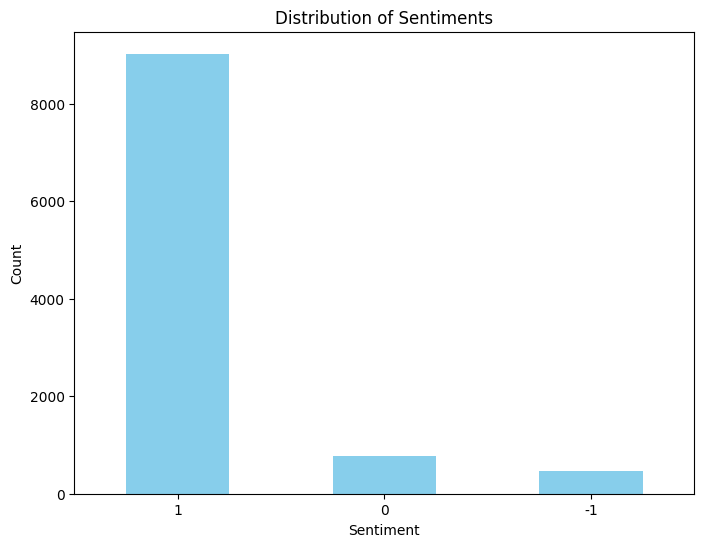

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'sentiment' column
# Load or prepare your data accordingly

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()



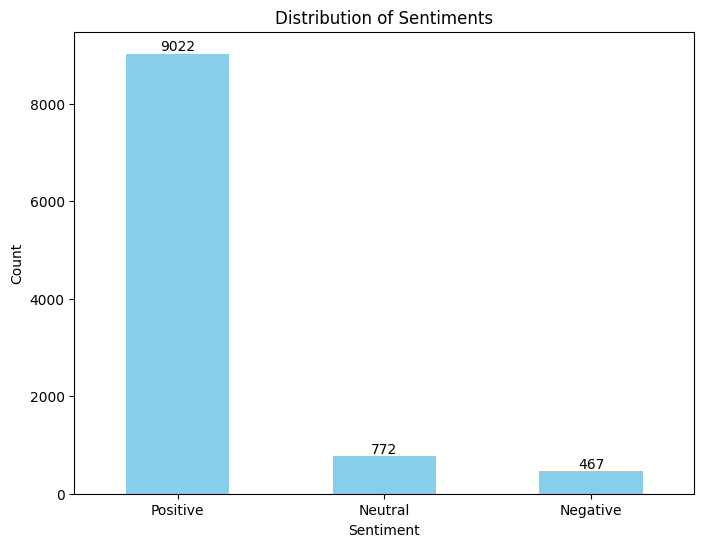

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the 'sentiment' column
# Load or prepare your data accordingly

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')

# Label the bars with sentiment labels
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Label the graph with sentiment labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(len(sentiment_counts)), ['Positive', 'Neutral', 'Negative'], rotation=0)
plt.show()


#### Preprocess the Text

**Lowercasing**: Convert all text to lowercase to ensure uniformity.

**Tokenization**: Split the text into individual words or tokens.

**Removing Punctuation**: Remove any punctuation marks, as they may not contribute significantly to sentiment analysis.

**Removing Stopwords**: Remove common words (e.g., 'and', 'the', 'is') that do not carry much meaning.

**Stemming or Lemmatization**: Reduce words to their base or root form to normalize the text.

**Removing Numbers**: Remove any numerical digits.

**Handling Special Characters**: Remove or handle any special characters that may not be relevant.

In [20]:
import spacy
import string

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Define a function for text preprocessing using spaCy
def preprocess_text(text):
    # Parse the text using spaCy
    doc = nlp(text)
    
    # Lemmatize tokens, remove punctuation and stopwords
    cleaned_tokens = []
    for token in doc:
        # Check if the token is a word, not a punctuation or a stop word
        if token.is_alpha and not token.is_punct and not token.is_stop:
            # Lemmatize the token and convert it to lowercase
            cleaned_token = token.lemma_.lower()
            cleaned_tokens.append(cleaned_token)
    
    # Join tokens back into a string
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text


In [21]:
# Assuming 'data' is your DataFrame containing the 'review' column
# Apply the preprocessing function to the 'review' column
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Display the DataFrame with the cleaned review column
print(data[['review', 'cleaned_review']].head())


                                              review  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven...   
4  This pop filter is great. It looks and perform...   

                                      cleaned_review  
0  write exactly suppose filter pop sound recordi...  
1  product exactly affordable realize double scre...  
2  primary job device block breath produce poppin...  
3  nice windscreen protect mxl mic prevent pop th...  
4  pop filter great look perform like studio filt...  


In [22]:
data.head()

,review,sentiment,cleaned_review
0,"Not much to write about here, but it does exac...",1,write exactly suppose filter pop sound recordi...
1,The product does exactly as it should and is q...,1,product exactly affordable realize double scre...
2,The primary job of this device is to block the...,1,primary job device block breath produce poppin...
3,Nice windscreen protects my MXL mic and preven...,1,nice windscreen protect mxl mic prevent pop th...
4,This pop filter is great. It looks and perform...,1,pop filter great look perform like studio filt...


In [23]:
data.drop('review', axis = 1)

,sentiment,cleaned_review
0,1,write exactly suppose filter pop sound recordi...
1,1,product exactly affordable realize double scre...
2,1,primary job device block breath produce poppin...
3,1,nice windscreen protect mxl mic prevent pop th...
4,1,pop filter great look perform like studio filt...
...,...,...
10256,1,great expect thank star
10257,1,think try nanoweb string bit high price cost t...
10258,1,try coated string past include elixirs fond tr...
10259,1,elixir developed taylor guitars string design ...


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X = data['cleaned_review']

y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train and evaluate Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
nb_report = classification_report(y_test, nb_pred)

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)
lr_report = classification_report(y_test, lr_pred)

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
rf_report = classification_report(y_test, rf_pred)

# Print classification reports
print("Naive Bayes Classification Report:")
print(nb_report)
print("Logistic Regression Classification Report:")
print(lr_report)
print("Random Forest Classification Report:")
print(rf_report)






Naive Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       104
           0       0.00      0.00      0.00       140
           1       0.88      1.00      0.94      1809

    accuracy                           0.88      2053
   macro avg       0.29      0.33      0.31      2053
weighted avg       0.78      0.88      0.83      2053

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.07      0.12       104
           0       0.52      0.08      0.14       140
           1       0.89      1.00      0.94      1809

    accuracy                           0.89      2053
   macro avg       0.70      0.38      0.40      2053
weighted avg       0.86      0.89      0.84      2053

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.06      0.11       104
           0  

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for each algorithm
nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Print performance metrics for each algorithm
print("Naive Bayes:")
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
print()

print("Logistic Regression:")
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print()

print("Random Forest:")
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)


Naive Bayes:
Precision: 0.7764245070179929
Recall: 0.8811495372625426
F1-score: 0.8254787741625788

Logistic Regression:
Precision: 0.8555865026838242
Recall: 0.8855333658061374
F1-score: 0.8435577477211591

Random Forest:
Precision: 0.8353075648701734
Recall: 0.8826108134437408
F1-score: 0.8349158241099274


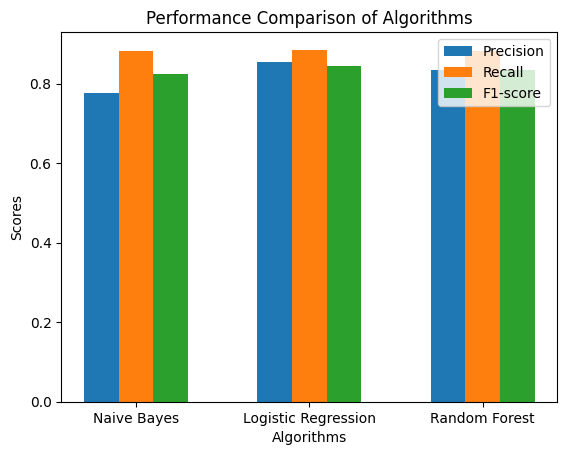

In [26]:
import matplotlib.pyplot as plt

# Labels for algorithms
labels = ['Naive Bayes', 'Logistic Regression', 'Random Forest']

# Scores for precision, recall, and F1-score
precision_scores = [nb_precision, lr_precision, rf_precision]
recall_scores = [nb_recall, lr_recall, rf_recall]
f1_scores = [nb_f1, lr_f1, rf_f1]

x = range(len(labels))
width = 0.2

plt.bar(x, precision_scores, width=width, label='Precision')
plt.bar([i + width for i in x], recall_scores, width=width, label='Recall')
plt.bar([i + width * 2 for i in x], f1_scores, width=width, label='F1-score')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Performance Comparison of Algorithms')
plt.xticks([i + width for i in x], labels)
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each algorithm
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print accuracy scores for each algorithm
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)



Naive Bayes Accuracy: 0.8811495372625426
Logistic Regression Accuracy: 0.8855333658061374
Random Forest Accuracy: 0.8826108134437408


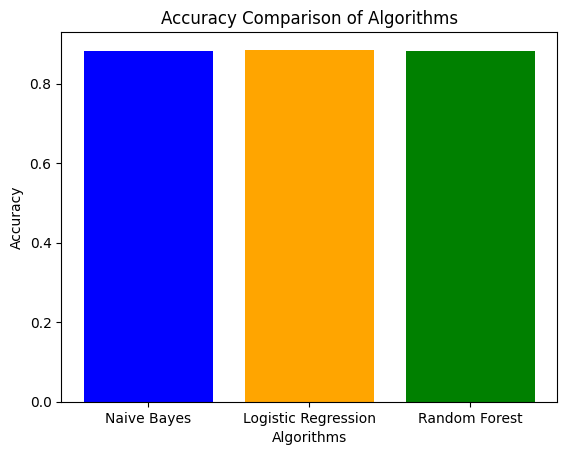

In [28]:
# Labels for algorithms
labels = ['Naive Bayes', 'Logistic Regression', 'Random Forest']

# Accuracy scores
accuracy_scores = [nb_accuracy, lr_accuracy, rf_accuracy]

plt.bar(labels, accuracy_scores, color=['blue', 'orange', 'green'])

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.show()
